<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-исходных-данных-и-исследовательский-анализ" data-toc-modified-id="Загрузка-исходных-данных-и-исследовательский-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка исходных данных и исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ обученной модели</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист" data-toc-modified-id="Чек-лист-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист</a></span></li></ul></div>

# Определение возраста покупателей по фотографии

**Цель проекта:** построение модели (на основе нейронной сети), определяющей по фотографии приблизительный возраст человека. Значение метрики MAE модели на тестовой выборке должно быть меньше 8. Перед созданием модели необходимо выполнить исследовательский анализ исходных данных. Модель предполагается использовать при внедрении системы компьютерного зрения для обработки фотографий покупателей в сетевом супермаркете. Это позволит выбрать товары, которые могут заинтерсовать покупателей той или иной возрастной группы.

**Исходные данные:** набор фотографий людей с указанием возраста. 

**Описание данных**  
Данные взяты с сайта ChaLearn Looking at People (https://chalearnlap.cvc.uab.cat/dataset/26/description/). Они находятся в папке /datasets/faces/  
В вашем распоряжении одна папка со всеми изображениями (/final_files) и csv-файл labels.csv с двумя колонками: file_name и real_age.

## Загрузка исходных данных и исследовательский анализ

Загружаем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import mean_absolute_error

Загрузим файл с названиями изображений и целевыми признаками.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

Изучим подробнее данный файл.

In [3]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Минимальный возраст в исходных данных - 1 год, максимальный - 100 лет, что выглядит правдоподобным. Для исследования распределения изображений по возрастам построим дополнительно гистограмму.

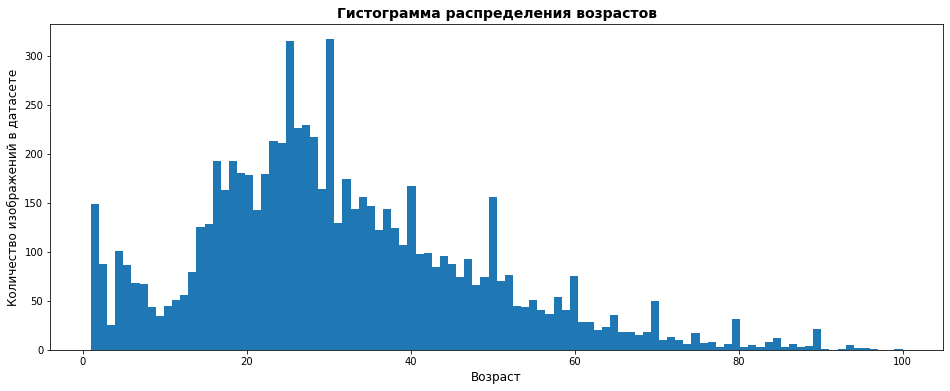

In [6]:
fig = plt.figure(figsize=(16, 6))
plt.hist(labels["real_age"], bins=100)
plt.title("Гистограмма распределения возрастов", fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество изображений в датасете', fontsize=12)
plt.show()

Из гистограммы очевидно, что в исходном датасете мало данных по возрастам старше 70 лет.

Пропусков, неправильных типов данных и/или каких либо других аномалий в исходном датафрейме не выявлено.

Общее количество изображений в папке 'final_files' весьма существенно: 7591 штук. Принимая это во внимание, сформируем из данных изображений батчи вместе с метками целевого признака (возраста) при помощи загрузчика ImageDataGenerator. Размер батча при этом примем равным 32 изображениям.

In [7]:
datagen = ImageDataGenerator(rescale=1./255)
datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


Для контроля исходных данных дополнительно выведем на экран 12 изображений из первого батча.

In [8]:
features, target = next(datagen_flow)

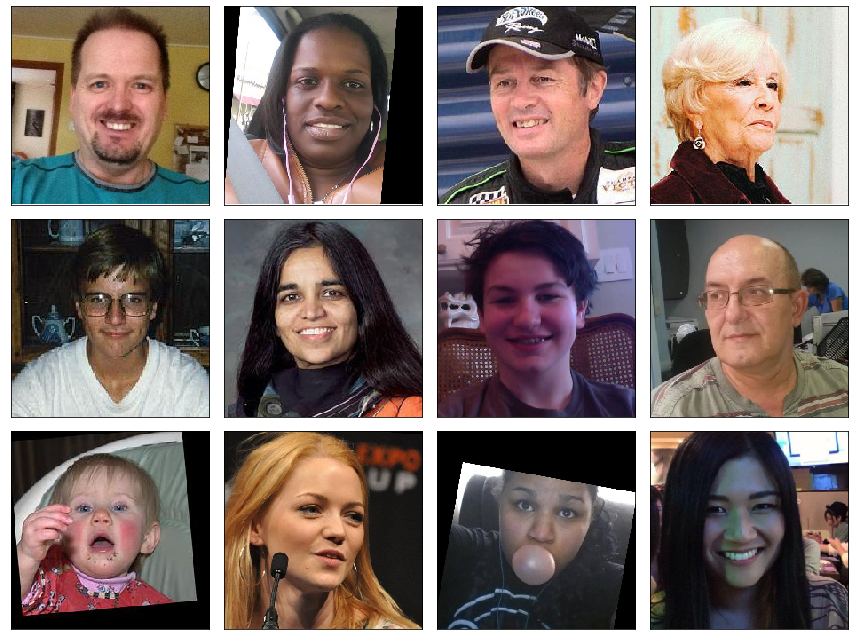

In [9]:
fig = plt.figure(figsize=(12, 9))
for i in range(12):
    fig.add_subplot(3, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

### Выводы

1. Общее количество изображений в исходном датасете - 7591 штук.
2. Минимальный возраст в исходных данных - 1 год, максимальный - 100 лет, что выглядит правдоподобным.
3. Пропусков, неправильных типов данных и/или каких либо других аномалий в исходном датафрейме не выявлено.
4. Принимая во внимание большое количество изображений в исходном датасете, из данных изображений сформированы батчи вместе с метками целевого признака (возраста) при помощи загрузчика ImageDataGenerator. Размер батча при этом принят равным 32 изображениям.

## Обучение модели

Выполним обучение модели с использованием GPU сервера, передав ему следующий код:

```python
import pandas as pd
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       validation_split=0.25,
                                       horizontal_flip=True,
                                       vertical_flip=True)
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=labels,
                                                           directory=path + 'final_files',
                                                           x_col='file_name',
                                                           y_col='real_age',
                                                           target_size=(224, 224),
                                                           batch_size=32,
                                                           class_mode='raw',
                                                           subset='training',
                                                           seed=12345)
    return train_datagen_flow


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    val_datagen = ImageDataGenerator(rescale=1. / 255,
                                     validation_split=0.25)
    val_datagen_flow = val_datagen.flow_from_dataframe(dataframe=labels,
                                                           directory=path + 'final_files/',
                                                           x_col='file_name',
                                                           y_col='real_age',
                                                           target_size=(224, 224),
                                                           batch_size=32,
                                                           class_mode='raw',
                                                           subset='validation',
                                                           seed=12345)
    return val_datagen_flow


def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              epochs=epochs,
              batch_size=batch_size,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model
```

В результате исполнения кода, переданного GPU серверу, и обучения модели получены следующие результаты:

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/10
2021-10-07 23:10:24.374586: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-07 23:10:29.906357: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 142s - loss: 254.0660 - mean_absolute_error: 11.6283 - val_loss: 778.5836 - val_mean_absolute_error: 22.9817
Epoch 2/10
178/178 - 37s - loss: 105.8199 - mean_absolute_error: 7.7254 - val_loss: 790.6170 - val_mean_absolute_error: 23.1457
Epoch 3/10
178/178 - 37s - loss: 76.8987 - mean_absolute_error: 6.6918 - val_loss: 419.9664 - val_mean_absolute_error: 15.3328
Epoch 4/10
178/178 - 37s - loss: 66.0007 - mean_absolute_error: 6.1291 - val_loss: 151.0578 - val_mean_absolute_error: 9.1127
Epoch 5/10
178/178 - 38s - loss: 52.1370 - mean_absolute_error: 5.4367 - val_loss: 242.3979 - val_mean_absolute_error: 12.9196
Epoch 6/10
178/178 - 37s - loss: 44.3695 - mean_absolute_error: 5.0341 - val_loss: 87.0630 - val_mean_absolute_error: 6.8689
Epoch 7/10
178/178 - 37s - loss: 37.5718 - mean_absolute_error: 4.6500 - val_loss: 112.3163 - val_mean_absolute_error: 7.7400
Epoch 8/10
178/178 - 37s - loss: 34.9349 - mean_absolute_error: 4.4929 - val_loss: 126.7494 - val_mean_absolute_error: 8.8455
Epoch 9/10
178/178 - 37s - loss: 29.3052 - mean_absolute_error: 4.1309 - val_loss: 73.7956 - val_mean_absolute_error: 6.5041
Epoch 10/10
178/178 - 37s - loss: 26.0939 - mean_absolute_error: 3.8881 - val_loss: 85.2027 - val_mean_absolute_error: 7.0566
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 85.2027 - mean_absolute_error: 7.0566
Test MAE: 7.0566>
```

### Выводы

1. Модель успешно обучена, при этом итоговая MAE на обучающей выборке равняется 3,89, на тестовой - 7,06.
2. Пороговая метрика качества в соответствии с заданием достигнута (MAE меньше 8).

## Анализ обученной модели

Проверим адекватность обученной модели, сравнив ее с простой медианной моделью. Для этого подсчитаем MAE для медианном модели (при расчете MAE для медианной модели рассматривалась полная выборка без разделения на обучающую и тестовую, данный подход оправдан, так как медианная модель вследствие своей простоты не склонна к переобучению). 

In [10]:
median = pd.Series(labels['real_age'].median(), index=labels['real_age'].index)
mean_absolute_error(labels['real_age'], median)

13.11987880384666

MAE для обученной модели существенно ниже, чем для медианной: 7,06 против 13,12. Это свидетельствует в пользу высокого  качества обученной модели.

### Выводы

1. Проверка обученной модели на адекватность (сравнение с медианной моделью) свидетельствует в пользу ее высокого качества.
2. В целом с увеличением количества эпох с 1 до 10 наблюдается заметный тренд на снижение MAE. Вероятно, потенциал улучшения качества модели за счет роста количества эпох не был исчерпан при использовании 10 эпох. Высокая производительность используемого для расчетов сервера GPU также позволяет рассмотреть модель с большим количеством эпох.
3. Модель имеет характерную тенденцию к переобучению. Итоговый MAE для обучающей выборки составляет всего лишь 55% от MAE для тестовой выборки. Это объясняется, вероятно, большими размерами используемой нейронной сети.
4. Относительно поставленных задач перед моделью по одной лишь общей для всех возрастов MAE затруднительно оценить насколько адекватна полученная модель. Так, например, ошибка в 7 лет, вероятно, будет приемлимой при определении категории товаров, если мы имеем человека с истинным возрастом 60 лет: очень грубо, можно предположить, что у 60 и 67 летнего человека приблизительно похожие интересы. Так же данная ошибка в указанном случае не приведет к ошибке при определении допустимости продажи алкоголя. Но для молодых категорий граждан ошибка в 7 лет может быть более критичной. Так, например, очевидно, что у 10-летнего и 17-летнего человека в среднем очень разные интересы. Так же 7 лет для молодых людей является очень критичной ошибкой при определение достижения 18 летнего возраста (для продажи алкоголя). С учетом этого, вероятно, все же будет целесообразным повысить качество модели, например засчет количества эпох (см. пункт 2). Кроме того при оценке качества модели полезным будет получить метрики качества не только для всех возрастов, но и для отдельных возрастных групп (при этом особенное внимание необходимо уделить молодым возрастам, при которых внешность меняется очень быстро).

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы